# Data Loading and Preprocessing

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
cust_acq = pd.read_csv(r"Customer Acqusition.csv").convert_dtypes()
spend = pd.read_csv('spend.csv').convert_dtypes()
repayment = pd.read_csv('Repayment.csv').convert_dtypes()

In [3]:
spend.Month = pd.to_datetime(spend.Month)
repayment.Month = pd.to_datetime(repayment.Month)

In [4]:
cust_spend = pd.merge(left=cust_acq,right=spend,on="Customer")
cust_repayment = pd.merge(left=cust_acq,right=repayment,on="Customer")

In [5]:
cust_spend.dtypes

No                   Int64
Customer            string
Age                  Int64
City                string
Product             string
Limit                Int64
Company             string
Segment             string
Sl No:               Int64
Month       datetime64[ns]
Type                string
Amount             Float64
dtype: object

In [6]:
cust_repayment.dtypes

No                     Int64
Customer              string
Age                    Int64
City                  string
Product               string
Limit                  Int64
Company               string
Segment               string
SL No:                 Int64
Month         datetime64[ns]
Amount               Float64
Unnamed: 4             Int64
dtype: object

## 1. In the above dataset,

### a. In case age is less than 18, replace it with mean of age values.

In [7]:
cust_acq[cust_acq.Age < 18]

,No,Customer,Age,City,Product,Limit,Company,Segment
13,14,A14,16,BANGALORE,Gold,500000,C14,Salaried_Pvt
40,41,A41,13,COCHIN,Platimum,500000,C23,Govt
62,63,A63,15,BANGALORE,Gold,500000,C25,Self Employed
67,68,A68,12,TRIVANDRUM,Silver,100000,C30,Self Employed
69,70,A70,16,BOMBAY,Platimum,10001,C32,Self Employed
89,90,A90,16,COCHIN,Gold,500000,C13,Govt


In [8]:
cust_acq.Age = np.where(cust_acq.Age<18,cust_acq.Age.mean(),cust_acq.Age)

### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
### (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [9]:
cust_spend.Amount = np.where(cust_spend.Amount > cust_spend.Limit, cust_spend.Limit/2,cust_spend.Amount)

### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [10]:
cust_repayment.Amount = np.where(cust_repayment.Amount > cust_repayment.Limit, cust_repayment.Limit,cust_repayment.Amount)

## 2. From the above dataset create the following summaries:
### a. How many distinct customers exist?

In [11]:
cust_acq.Customer.nunique()

100

### b. How many distinct categories exist?

In [12]:
cust_acq.Product.nunique()

3

### c. What is the average monthly spend by customers?

In [13]:
df = cust_spend.copy()
df

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8
1,1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,5,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000,C20,Govt,99,2004-01-12,AUTO,5000.0
1497,98,A98,51,CALCUTTA,Platimum,10001,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.5
1498,99,A99,35,CALCUTTA,Platimum,10002,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.0


In [14]:
df['Month'] = df['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%b"))

In [15]:
df.groupby(['Customer','Month']).agg({'Amount':'mean'})

Amount
Customer Month               
A1       Apr    261649.250000
         Aug    344372.100000
         Feb    175235.690000
         Jan    372762.587143
         May    361141.310000
...                       ...
A95      Jan    240401.500000
A96      Jan     54729.660000
A97      Jan      5000.000000
A98      Jan      5000.500000
A99      Jan      5001.000000

[578 rows x 1 columns]

###  d. What is the average monthly repayment by customers?

In [16]:
df1 = cust_repayment.copy()

In [17]:
df1['Month'] = df1['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%b"))

In [18]:
df1.groupby(['Customer','Month']).agg({'Amount':'mean'})

Amount
Customer Month               
A1       Apr    254474.580000
         Feb    156374.760000
         Jan    343972.327143
         Jul    297176.740000
         Nov    285729.090000
...                       ...
A95      Jan    369405.960000
A96      Jan    100000.000000
A97      Jan     10000.000000
A98      Jan     10001.000000
A99      Jan     10002.000000

[558 rows x 1 columns]

### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
#### Profit is defined as interest earned on Monthly Profit. 
#### Monthly Profit = Monthly repayment– Monthly spend. Interest is earned only on positive profits and not on negative amounts


In [19]:
cust_spend_repayment = pd.merge(left = cust_spend, right = cust_repayment, how = 'inner', left_on = 'Customer', right_on = 'Customer')

In [20]:
cust_spend_repayment = cust_spend_repayment.rename(columns = {'Amount_x' : 'spend_Amount', 'Amount_y' : 'repay_Amount'})

In [21]:
cust_spend_repayment['year'] = pd.DatetimeIndex(cust_spend_repayment['Month_x']).year
cust_spend_repayment['Monthly'] = cust_spend_repayment['Month_x'].apply(lambda x:pd.Timestamp.strftime(x,format="%b"))

In [22]:
interest_amt = cust_spend_repayment.groupby(['year', 'Monthly']).agg({'spend_Amount':'sum','repay_Amount':'sum'})
interest_amt

spend_Amount       repay_Amount
year Monthly                                      
2004 Apr            90493408.79       108692616.54
     Feb            98423681.94       119042306.77
     Jan      1143343427.329996  1238320376.789997
     Mar            52770914.76        56720434.87
     May            58410222.65         72639254.8
     Nov            31252156.84         51059945.9
     Sep            65075248.05        62904611.51
2005 Apr           119802234.14       128543819.84
     Aug           105183586.87        113405428.4
     Dec            31708601.21        58570306.55
     Feb       679270136.279999       796590439.45
     Jan           151180351.37       115659346.94
     Jul            46366284.92        58386084.22
     Jun           232543539.53       222831496.48
     May       590538912.480003   643446738.640001
     Nov       191496532.390001       179353636.39
     Oct             30773810.4        46368581.64
     Sep            38449166.23        46626304.22
2006 Apr       319271330.289997       365892889.42
     Aug            83554351.68         91120328.0
     Dec             44476260.3        52813602.21
     Feb           148015126.73       146607959.36
     Jan            44558733.62        51416416.04
     Jul       151831670.349999       138659818.11
     Jun            59495660.84         64533335.5
     Mar       708217479.250003   811785088.929999
     May           204726235.16       217506469.91
     Nov            93311927.44       120524043.87
     Oct            70634334.69        81050889.05
     Sep             62812311.1        84247549.98

In [23]:
interest_amt["Profit"] = interest_amt.repay_Amount - interest_amt.spend_Amount
interest_amt["interest"] = interest_amt.Profit * 2.9/100
interest_amt

spend_Amount       repay_Amount            Profit  \
year Monthly                                                           
2004 Apr            90493408.79       108692616.54       18199207.75   
     Feb            98423681.94       119042306.77       20618624.83   
     Jan      1143343427.329996  1238320376.789997   94976949.460001   
     Mar            52770914.76        56720434.87        3949520.11   
     May            58410222.65         72639254.8       14229032.15   
     Nov            31252156.84         51059945.9       19807789.06   
     Sep            65075248.05        62904611.51       -2170636.54   
2005 Apr           119802234.14       128543819.84         8741585.7   
     Aug           105183586.87        113405428.4        8221841.53   
     Dec            31708601.21        58570306.55       26861705.34   
     Feb       679270136.279999       796590439.45  117320303.170001   
     Jan           151180351.37       115659346.94      -35521004.43   
     Jul            46366284.92        58386084.22        12019799.3   
     Jun           232543539.53       222831496.48   -9712043.050001   
     May       590538912.480003   643446738.640001   52907826.159998   
     Nov       191496532.390001       179353636.39  -12142896.000001   
     Oct             30773810.4        46368581.64       15594771.24   
     Sep            38449166.23        46626304.22        8177137.99   
2006 Apr       319271330.289997       365892889.42   46621559.130003   
     Aug            83554351.68         91120328.0        7565976.32   
     Dec             44476260.3        52813602.21        8337341.91   
     Feb           148015126.73       146607959.36       -1407167.37   
     Jan            44558733.62        51416416.04        6857682.42   
     Jul       151831670.349999       138659818.11  -13171852.239999   
     Jun            59495660.84         64533335.5        5037674.66   
     Mar       708217479.250003   811785088.929999  103567609.679996   
     May           204726235.16       217506469.91       12780234.75   
     Nov            93311927.44       120524043.87       27212116.43   
     Oct            70634334.69        81050889.05       10416554.36   
     Sep             62812311.1        84247549.98       21435238.88   

                   interest  
year Monthly                 
2004 Apr       527777.02475  
     Feb       597940.12007  
     Jan      2754331.53434  
     Mar       114536.08319  
     May       412641.93235  
     Nov       574425.88274  
     Sep       -62948.45966  
2005 Apr        253505.9853  
     Aug       238433.40437  
     Dec       778989.45486  
     Feb      3402288.79193  
     Jan     -1030109.12847  
     Jul        348574.1797  
     Jun      -281649.24845  
     May      1534326.95864  
     Nov        -352143.984  
     Oct       452248.36596  
     Sep       237137.00171  
2006 Apr      1352025.21477  
     Aug       219413.31328  
     Dec       241782.91539  
     Feb       -40807.85373  
     Jan       198872.79018  
     Jul      -381983.71496  
     Jun       146092.56514  
     Mar      3003460.68072  
     May       370626.80775  
     Nov       789151.37647  
     Oct       302080.07644  
     Sep       621621.92752

### f. What are the top 5 product types?

In [24]:
cust_spend["Type"].value_counts().head(5)

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: Int64

### g. Which city is having maximum spend?

In [25]:
cust_spend.groupby('City').agg({'Amount':'sum'}).sort_values("Amount",ascending=False)

,Amount
City,
COCHIN,45963513.5
CALCUTTA,41108132.3
BANGALORE,40461647.02
BOMBAY,28603127.38
CHENNAI,22128635.65
TRIVANDRUM,15337155.87
PATNA,15260586.97
DELHI,10918286.54


### h. Which age group is spending more money? 

In [26]:
cust_spend["Age_Group"]=np.where(((cust_spend.Age.astype(int)>=18) & (cust_spend.Age.astype(int)<25)),"Youth",
                                     np.where(((cust_spend.Age.astype(int)>=25) & (cust_spend.Age.astype(int)<45)),"Adult","Senior" ))


In [27]:
cust_spend.groupby("Age_Group").agg({'Amount':'sum'}).sort_values("Amount",ascending=False)

,Amount
Age_Group,
Senior,111701137.56
Adult,93399451.09
Youth,14680496.58


### i. Who are the top 10 customers in terms of repayment?

In [28]:
top10 = cust_repayment.groupby('Customer').agg({'Amount':'sum'}).sort_values("Amount",ascending=False)
top10 = top10[0:10]
top10

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.3


## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.


In [29]:
df2 = cust_spend.copy()
df2.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group
0,1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,Senior
1,1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2,2004-01-03,PETRO,410556.13,Senior
2,1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,Senior
3,1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,4,2004-01-25,FOOD,484342.47,Senior
4,1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,Senior


In [30]:
df2['Year'] = df2.Month.dt.year

In [31]:
City_Data=pd.pivot_table(data=df2,index="City",columns=['Product','Year'],values='Amount',aggfunc='sum')
City_Data

Product       Gold                                  Platimum              \
Year              2004         2005         2006        2004        2005   
City                                                                       
BANGALORE   9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY      6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA    7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI     1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN      7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI       2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA       2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM  2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                   Silver                           
Year              2006        2004       2005        2006  
City                                                       
BANGALORE    685831.27  1291852.58  830612.34  1415480.94  
BOMBAY       972130.01   532089.03  508988.54  1092833.80  
CALCUTTA    3589606.66   500006.00  440147.06  1157956.42  
CHENNAI     5024923.40   282056.86  377184.49   350009.50  
COCHIN      4920592.29   814229.62  652269.38  1269990.87  
DELHI        176788.72   768172.30  612311.21   854899.97  
PATNA       1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM  2147403.75   209667.48  269912.99   555862.12

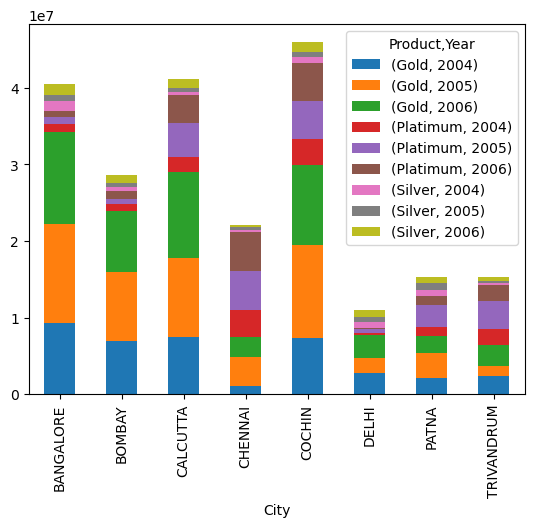

In [32]:
City_Data.plot(kind='bar',stacked=True)
plt.show()

## 4. Create graphs for
### a. Monthly comparison of total spends, city wise

In [33]:
df3 = cust_spend.copy()

In [34]:
df3['monthname'] = df3['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%b"))

In [35]:
Monthy_Spend=pd.pivot_table(data=df3,index="City",columns=['monthname'],values='Amount',aggfunc='sum')
Monthy_Spend

monthname,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


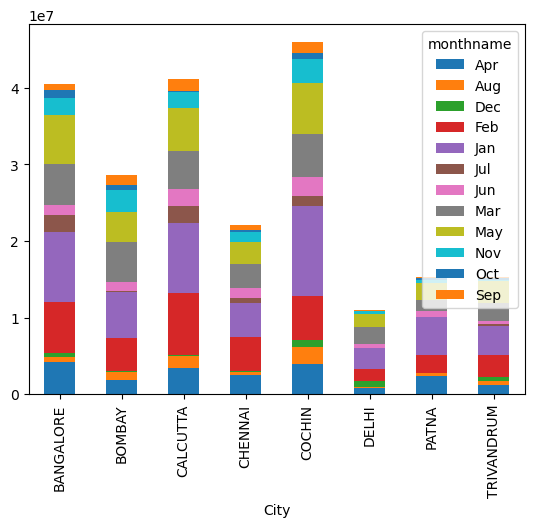

In [36]:
Monthy_Spend.plot(kind='bar',stacked=True)
plt.show()

### b. Comparison of yearly spend on air tickets

In [37]:
yearly_spend = pd.pivot_table(data=df2[df2.Type=='AIR TICKET'],index="Type",columns=['Year'],values='Amount',aggfunc='sum')
yearly_spend

Year,2004,2005,2006
Type,,,
AIR TICKET,4357225.35,10550152.21,5248469.56


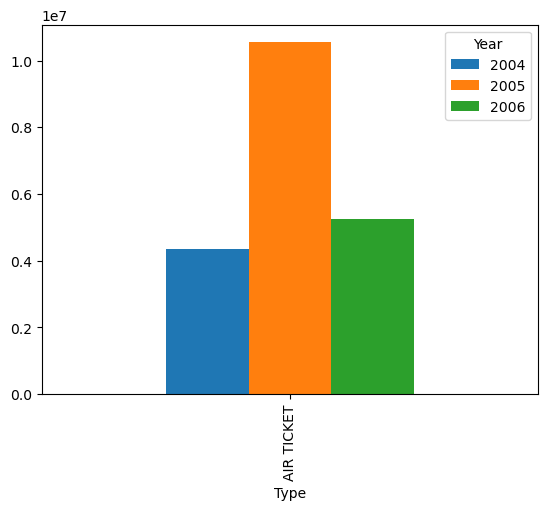

In [38]:
yearly_spend.plot(kind='bar')
plt.show()

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [39]:
monthyspend_product=pd.pivot_table(data=df3,index='Product',columns='monthname',values='Amount',aggfunc='sum')
monthyspend_product

monthname,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


<AxesSubplot: xlabel='Product'>

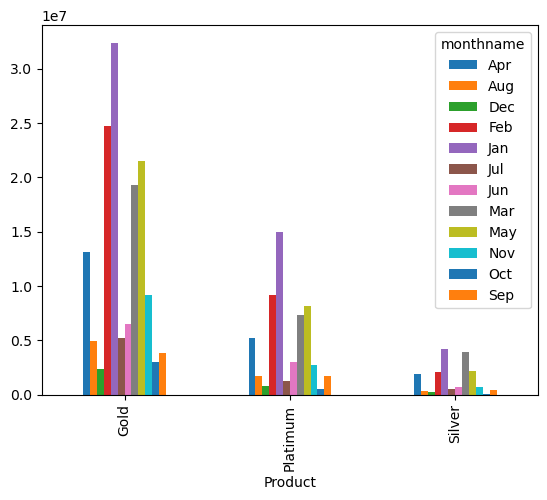

In [40]:
monthyspend_product.plot(kind='bar')

## 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [41]:
cust_repayment["yearly"]=cust_repayment["Month"].dt.year
cust_repayment["monthly"]=cust_repayment["Month"].apply(lambda x:pd.Timestamp.strftime(x,format="%b"))

In [42]:
def top10Customers(product_category,time_period):
    return cust_repayment.loc[(cust_repayment.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [43]:
top10Customers('Gold','yearly')

,Customer,City,Product,yearly,Amount
64,A61,COCHIN,Gold,2005,4276860.55
55,A44,DELHI,Gold,2005,4165317.77
58,A45,COCHIN,Gold,2005,4042447.57
52,A43,BANGALORE,Gold,2005,4006956.6
13,A13,BANGALORE,Gold,2005,3757673.0
65,A61,COCHIN,Gold,2006,3744127.41
61,A60,CALCUTTA,Gold,2005,3742856.1
14,A13,BANGALORE,Gold,2006,3477314.89
38,A29,CALCUTTA,Gold,2006,3434298.0
35,A28,TRIVANDRUM,Gold,2006,3376614.65
